# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [78]:
import pandas as pd
import plotly.express as px


# Notebook Presentation

In [79]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [80]:
df_apps = pd.read_csv('apps.csv')

In [81]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
9812,Wordscapes,GAME,4.80,230849,87.00,"10,000,000",Free,0,Everyone,Word,"August 2, 2018",4.1 and up
9122,Credit Karma,FINANCE,4.70,706301,9.15,"10,000,000",Free,0,Everyone,Finance,"July 31, 2018",Varies with device
7234,Discovery K!ds Play! Español,FAMILY,4.20,11263,35.00,"1,000,000",Free,0,Everyone,Entertainment;Music & Video,"May 3, 2018",4.0.3 and up
9874,File Manager -- Take Command of Your Files Easily,TOOLS,4.20,127223,7.60,"10,000,000",Free,0,Everyone,Tools,"August 3, 2018",5.0 and up
1070,junainfo.dy.fi,TRAVEL_AND_LOCAL,NaN,8,1.90,100,Free,0,Everyone,Travel & Local,"October 21, 2015",4.0 and up


# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [82]:
df_apps.shape

(10841, 12)

In [83]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

In [84]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2748,Zoho Reports - Mobile BI,BUSINESS,4.70,45,12.00,"5,000",Free,0,Everyone,Business,"May 23, 2018",4.1 and up
1433,CW Bluetooth SPP,COMMUNICATION,NaN,3,0.94,100,Free,0,Everyone,Communication,"March 31, 2018",6.0 and up
2615,Texas Hold'em EV Calculator,TOOLS,3.70,6,1.30,"1,000",Free,0,Everyone,Tools,"November 8, 2015",2.3 and up
1591,BG Products,AUTO_AND_VEHICLES,4.80,4,4.50,500,Free,0,Everyone,Auto & Vehicles,"November 28, 2017",5.0 and up
7054,Chrome Canary (Unstable),PRODUCTIVITY,4.30,21866,4.00,"1,000,000",Free,0,Everyone,Productivity,"August 4, 2018",Varies with device


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [85]:
try:
    df_apps.drop("Last_Updated", axis=1, inplace=True)
except:
    pass
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Android_Ver'],
      dtype='object')

In [86]:
df_apps.sample(3)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Android_Ver
9337,ASUS Sound Recorder,TOOLS,4.50,34126,3.40,"10,000,000",Free,0,Everyone,Tools,Varies with device
8655,Nights at Cube Pizzeria 3D – 2,GAME,4.00,47151,36.00,"5,000,000",Free,0,Everyone 10+,Action,4.3 and up
10531,Google Sheets,PRODUCTIVITY,4.30,496397,4.00,"100,000,000",Free,0,Everyone,Productivity,Varies with device


In [87]:
del df_apps["Android_Ver"]
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres'],
      dtype='object')

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [88]:
df_apps.isna().value_counts()

App    Category  Rating  Reviews  Size_MBs  Installs  Type   Price  Content_Rating  Genres
False  False     False   False    False     False     False  False  False           False     9367
                 True    False    False     False     False  False  False           False     1473
                                                      True   False  False           False        1
Name: count, dtype: int64

In [89]:
df_apps_clean = df_apps.dropna()
df_apps_clean.isna().values.any()

False

In [90]:
df_apps_clean.isna().value_counts()

App    Category  Rating  Reviews  Size_MBs  Installs  Type   Price  Content_Rating  Genres
False  False     False   False    False     False     False  False  False           False     9367
Name: count, dtype: int64

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [91]:
df_apps_clean[df_apps_clean.duplicated()].sort_values(by="App", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10156,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.20,219848,12.00,"50,000,000",Free,0,Everyone,Travel & Local
10159,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.20,219848,12.00,"50,000,000",Free,0,Everyone,Travel & Local
9634,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.40,133833,34.00,"10,000,000",Free,0,Everyone 10+,Sports
9635,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.40,133833,34.00,"10,000,000",Free,0,Everyone 10+,Sports
9632,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.40,133825,34.00,"10,000,000",Free,0,Everyone 10+,Sports


In [92]:
df_apps_clean.duplicated().count()

9367

In [93]:
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [94]:
df_apps_clean.drop_duplicates(subset=["App", "Type", "Price"], inplace=True)

C:\Users\shahi\AppData\Local\Temp\ipykernel_15520\2986174200.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
df_apps_clean[df_apps_clean.App == "Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [96]:
df_apps_clean.duplicated().count()

8199

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [97]:
df_apps_clean.sort_values(by="Rating", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


Based on above looks like Rating for low installs or single install are very high and reviewers are less
This wont help to get good rated app if we just rely on ratings

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [98]:
df_apps_clean.sort_values(by="Size_MBs", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [99]:
df_apps_clean.sort_values(by="Reviews", ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [100]:
df_apps_clean.Content_Rating.unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Unrated',
       'Adults only 18+'], dtype=object)

In [101]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [102]:
fig = px.pie(labels=ratings.index, values=ratings.values,title="Content Rating",
names=ratings.index)
fig.show()

In [103]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

In [104]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating - Donut",
names=ratings.index,
hole=0.5
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [105]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [106]:
df_apps_clean.Installs.describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [107]:
df_apps_clean.Installs.dtype

dtype('O')

In [108]:
df_apps_clean.Installs.unique()

array(['1', '5', '10', '50', '100', '500', '1,000', '5,000', '10,000',
       '50,000', '100,000', '500,000', '1,000,000', '5,000,000',
       '10,000,000', '50,000,000', '100,000,000', '500,000,000',
       '1,000,000,000'], dtype=object)

In [109]:
df_apps_clean.loc[:, "Installs"]= df_apps_clean.Installs.astype(str).str.replace(',', '')
df_apps_clean.Installs.unique()

array(['1', '5', '10', '50', '100', '500', '1000', '5000', '10000',
       '50000', '100000', '500000', '1000000', '5000000', '10000000',
       '50000000', '100000000', '500000000', '1000000000'], dtype=object)

In [110]:
df_apps_clean.loc[:,"Installs"] = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean.Installs.describe()

count        8199
unique         19
top       1000000
freq         1417
Name: Installs, dtype: int64

In [111]:
df_apps_clean[["App", "Installs"]].groupby("Installs").count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [112]:
df_apps_clean.Price.unique()

array(['0', '$1.49', '$0.99', '$14.99', '$2.49', '$3.04', '$3.49',
       '$2.99', '$4.99', '$29.99', '$19.99', '$1.99', '$1.76', '$8.99',
       '$1.75', '$12.99', '$7.99', '$3.99', '$3.88', '$4.59', '$9.99',
       '$14.00', '$4.49', '$6.99', '$399.99', '$5.99', '$39.99', '$3.02',
       '$6.49', '$17.99', '$2.00', '$15.99', '$10.99', '$1.61', '$4.29',
       '$15.46', '$7.49', '$5.49', '$1.70', '$379.99', '$79.99', '$2.56',
       '$8.49', '$1.50', '$4.84', '$19.40', '$33.99', '$3.08', '$16.99',
       '$37.99', '$10.00', '$1.29', '$4.60', '$1.00', '$24.99', '$2.50',
       '$3.90', '$2.95', '$1.97', '$3.28', '$299.99', '$389.99', '$1.20',
       '$400.00', '$2.59', '$18.99', '$1.59', '$11.99', '$4.77', '$9.00',
       '$3.95', '$13.99', '$2.90'], dtype=object)

In [113]:
df_apps_clean.loc[:,"Price"] = df_apps_clean.Price.astype('str').str.replace("$", "")

In [114]:
df_apps_clean.loc[:,"Price"] = pd.to_numeric(df_apps_clean.Price)

In [115]:
df_apps_clean.Price.describe()

count    8,199.00
unique      73.00
top          0.00
freq     7,595.00
Name: Price, dtype: float64

### The most expensive apps sub $250

In [116]:
df_apps_clean[["App", "Price"]].sort_values("Price", ascending=False).head(20)

,App,Price
3946,I'm Rich - Trump Edition,400.00
2461,I AM RICH PRO PLUS,399.99
4606,I Am Rich Premium,399.99
3145,I am rich(premium),399.99
3554,💎 I'm rich,399.99
5765,I am rich,399.99
1946,I am rich (Most expensive app),399.99
2775,I Am Rich Pro,399.99
3221,I am Rich Plus,399.99
3114,I am Rich,399.99


In [117]:

df_app_greater_than_250_price = df_apps_clean[df_apps_clean.Price > 250]
df_apps_clean.drop(df_app_greater_than_250_price.index, axis=0, inplace=True)
df_apps_clean[df_apps_clean.Price > 250]

C:\Users\shahi\AppData\Local\Temp\ipykernel_15520\676738797.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres


### Highest Grossing Paid Apps (ballpark estimate)

In [118]:
df_apps_clean.sort_values("Price", ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10,Paid,29.99,Mature 17+,Education
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,100000,Paid,24.99,Everyone,Medical
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.20,168,25.00,10000,Paid,24.99,Everyone,Medical


In [119]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

C:\Users\shahi\AppData\Local\Temp\ipykernel_15520\2703497668.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [120]:
df_apps_clean.Category.nunique()


33

In [121]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

Category
FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [122]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
 
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [123]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

In [124]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [125]:
df_apps_w_installs = df_apps_clean.groupby("Category").agg({'App': pd.Series.count, 'Installs': pd.Series.sum}).sort_values('Installs', ascending=False)

In [126]:
scatter = px.scatter(df_apps_w_installs, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=df_apps_w_installs.index,
                    color='Installs')
# text=df_apps_w_installs.index if we pass above param it would display text on markers
 
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
 
scatter.show()

From above below are observations:
1. Tools, Games and Family are most diversified and popular categories
2. Productivity, Social, Communications and Photography are Concentrated and popular 
   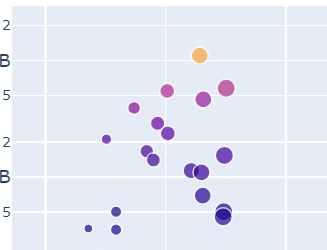
3. Rest of categories are concentrated and less liked

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [130]:
df_apps_clean.Genres.value_counts()

Genres
Tools                                718
Entertainment                        467
Education                            429
Productivity                         301
Personalization                      298
                                    ... 
Adventure;Brain Games                  1
Travel & Local;Action & Adventure      1
Art & Design;Pretend Play              1
Music & Audio;Music & Video            1
Lifestyle;Pretend Play                 1
Name: count, Length: 114, dtype: int64

In [135]:
stack = df_apps_clean.Genres.str.split(";",expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [145]:
genres_by_num_of_app = stack.value_counts()
genres_by_num_of_app.head(10)

Tools              719
Education          587
Entertainment      498
Action             304
Productivity       301
Personalization    298
Lifestyle          298
Finance            296
Medical            292
Sports             270
Name: count, dtype: int64

In [161]:
genre_bar = px.bar(x=genres_by_num_of_app.index[:15], y=genres_by_num_of_app.values[:15],
                   labels={'x': 'Genre', 'y': 'Number of Apps'},
                   hover_name=genres_by_num_of_app.index[:15],
                   color=genres_by_num_of_app.values[:15],
                   title="Top Genres", color_continuous_scale="Agsunset")

genre_bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [162]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

In [163]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


In [164]:
box = px.box(df_apps_clean,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')
 
box.update_layout(yaxis=dict(type='log'))
 
box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [165]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps, 
             x='Category', 
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))
 
 
box.show()


# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [166]:
df_paid_apps.Price.median()


2.99

In [171]:
df_paid_apps.Price.describe()

count    589.00
unique    67.00
top        2.99
freq     109.00
Name: Price, dtype: float64

In [168]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')
 
box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))
 
box.show()